<h2>Fire Incidents</h2>
<p>The data set I used for Fire Incidents Data came from the Western Pennsylvania Regional Data Center. This data set features information on Fire Incidents, their types of fires, and the amount of fires covering a total of 91 neighborhoods.</p>

<h3>Types of Fires</h3>
<ul>
    <li>Building Fires</li>
    <li>Vehicle Fires</li>
    <li>Outside Rubbish Fires</li>
    <li>Trash Waste Fires</li>
    <li>Cooking Fires</li>
    <li>Other</li>
</ul>

<h3>Effect of Fires on the Environment:</h3>
<ul>
    <li>Possibility of health issues increase.</li>
    <li>Possibility of property damage</li>
    <li>Expensive costs to maintain.</li>
    <li>Posibility of wildlife getting disrupted.</li>
    <li>Posibility of soil damage.</li>
</ul>

In [4]:
# Fire Incidents Dataset Analysis By: Eric Lim
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import seaborn as sns
from IPython.core.display import display, HTML
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Read File
fire_incidents_dataset = pd.read_csv("fireincidents.csv")
fire_incidents_dataset = fire_incidents_dataset.reset_index()

# Gets List of Neighborhoods
neighborhood_list = fire_incidents_dataset['neighborhood'].unique()

# Gets Frequency of Fire Incidents per Neighborhood
fires_per_neighborhood = fire_incidents_dataset['neighborhood'].value_counts().to_dict()

# Create New Column in Dataframe and For Each Row in Dataframe Add Fire Count For That Neighborhood
fire_incidents_dataset['counts'] = 0
for index, row in fire_incidents_dataset.iterrows():
    fire_incidents_dataset.at[index, 'counts'] = fires_per_neighborhood.get(row['neighborhood'])

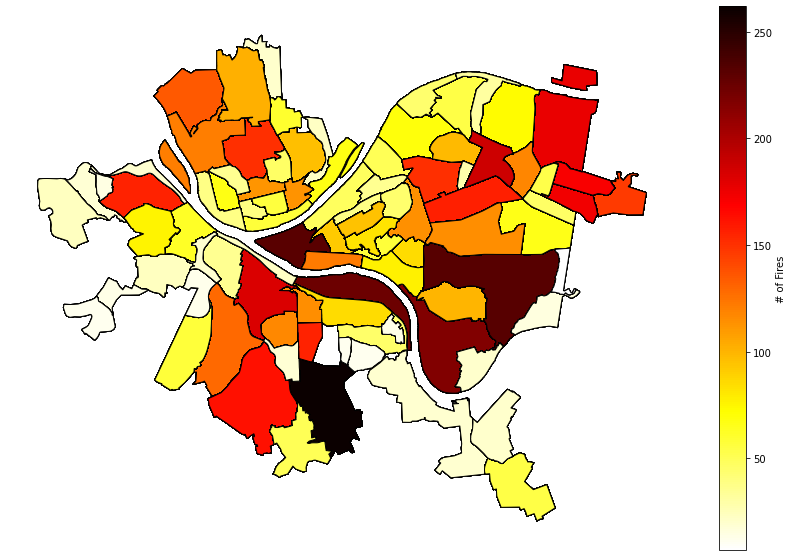

In [5]:
# Printing Map of Fire Incidents Counts

# Read in The Shapefile
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

# Title of Map
display(HTML("<h3>Fires Per Neighborhood</h3>"))

# Map Plotting
fires_map = neighborhoods.merge(fire_incidents_dataset, how='left', left_on='hood', right_on='neighborhood')
fires_plot = fires_map.plot(column='counts', edgecolor="black", cmap='hot_r', legend=True, legend_kwds={'label': "# of Fires"}, figsize=(15, 10))
fires_plot.set_axis_off();

In [6]:
# Title of Dataframe
display(HTML("<h3>Top 10 Neighborhoods</h3>"))

# Convert Fires Dictionary to a Dataframe
fires_per_neighborhood_df = pd.DataFrame(fires_per_neighborhood.items(), columns=['neighborhood', 'counts'])
fires_per_neighborhood_df.tail(11)

,neighborhood,counts
80,Windgap,18
81,Swisshelm Park,15
82,Chartiers City,14
83,Arlington Heights,13
84,Oakwood,13
85,Ridgemont,12
86,St. Clair,11
87,East Carnegie,11
88,Mt. Oliver,11
89,Regent Square,7


In [7]:
# Title of Dataframe
display(HTML("<h3>Bottom 10 Neighborhoods</h3>"))

# Convert Fires Dictionary to a Dataframe
fires_per_neighborhood_df = pd.DataFrame(fires_per_neighborhood.items(), columns=['neighborhood', 'counts'])
fires_per_neighborhood_df.head(11)

,neighborhood,counts
0,Carrick,262
1,Squirrel Hill South,233
2,Central Business District,232
3,South Side Flats,225
4,Hazelwood,217
5,East Liberty,188
6,Mount Washington,183
7,Lincoln-Lemington-Belmar,177
8,Homewood South,174
9,Homewood North,171


<h3>Fire Incidents Data Conclusion</h3>
<p>The neighborhoods with the most fires tends to have a greater area. Mount Oliver is the neighborhood with the fewest fire incidents, followed by Regent Square. On the other hand, Carrick is the neighborhood with the most fire incidents followed by Squirrel Hill. It makes sense that Carrick and Squirrel Hill has the most fires because they are fairly large neighborhoods compared to neighborhoods like Mount Oliver or Regent Square.</p>

<hr>

<h3>Resources</h3>
<!-- everyone add the resources they used here -->
<ul>
    <li>Fire Incidents Dataset from: <a href="https://data.wprdc.org/dataset/allegheny-county-illegal-dump-sitesinner_span=True">WPRDC</a></li>
    <li>Fire Disadvantageeffects from: <a href="http://www.pacificbio.org/initiatives/fire/fire_ecology.html#:~:text=Disadvantages%3A,intense%20fire%2C%20erosion%20can%20occur.">Fire Disadvantages</a></li>
</ul>